# Energy Consumption Time Series Analysis


# Introduction
This notebook performs a time series analysis on energy consumption data. It involves data preprocessing, visualization, and forecasting using ARIMA models. The dataset contains energy demand and weather-related variables, and we aim to analyze trends and make predictions based on this data.


# Importing Libraries


In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

# Data Loading and Initial Inspection


In [49]:
df = pd.read_csv('/content/drive/MyDrive/INTERNSHIP/nyc_energy_consumption.csv')
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [50]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


# Visualization of January 2013 Data


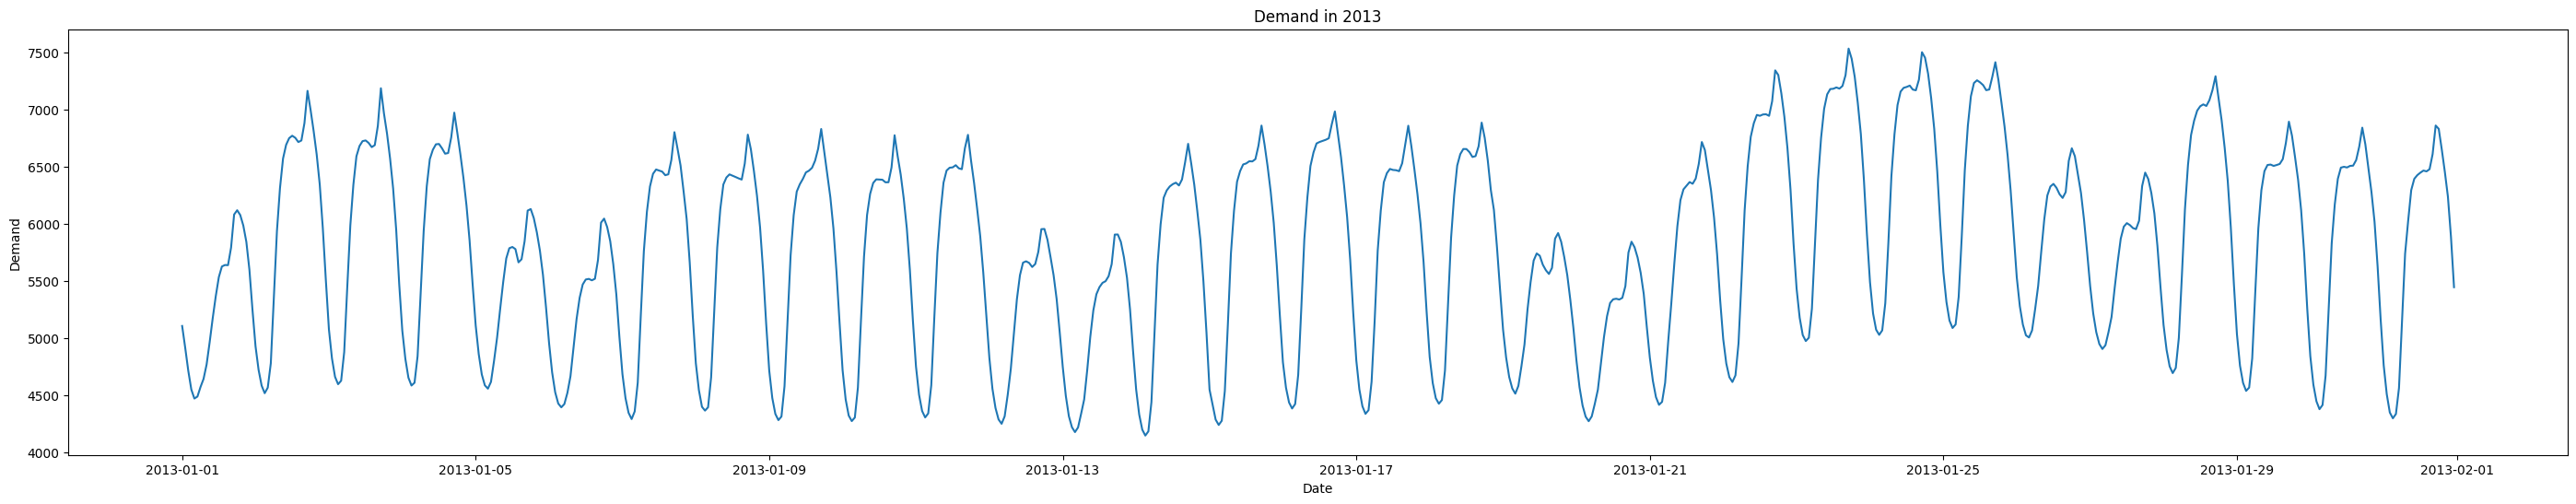

In [52]:
df2013 = df[(df['timeStamp'].dt.year == 2013) & (df['timeStamp'].dt.month == 1)]
plt.figure(figsize=(35, 6))
plt.plot(df2013['timeStamp'], df2013['demand'])
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand in 2013')
plt.show()

In [53]:
df.set_index('timeStamp', inplace=True)
df.head()

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


# Plotting All Data


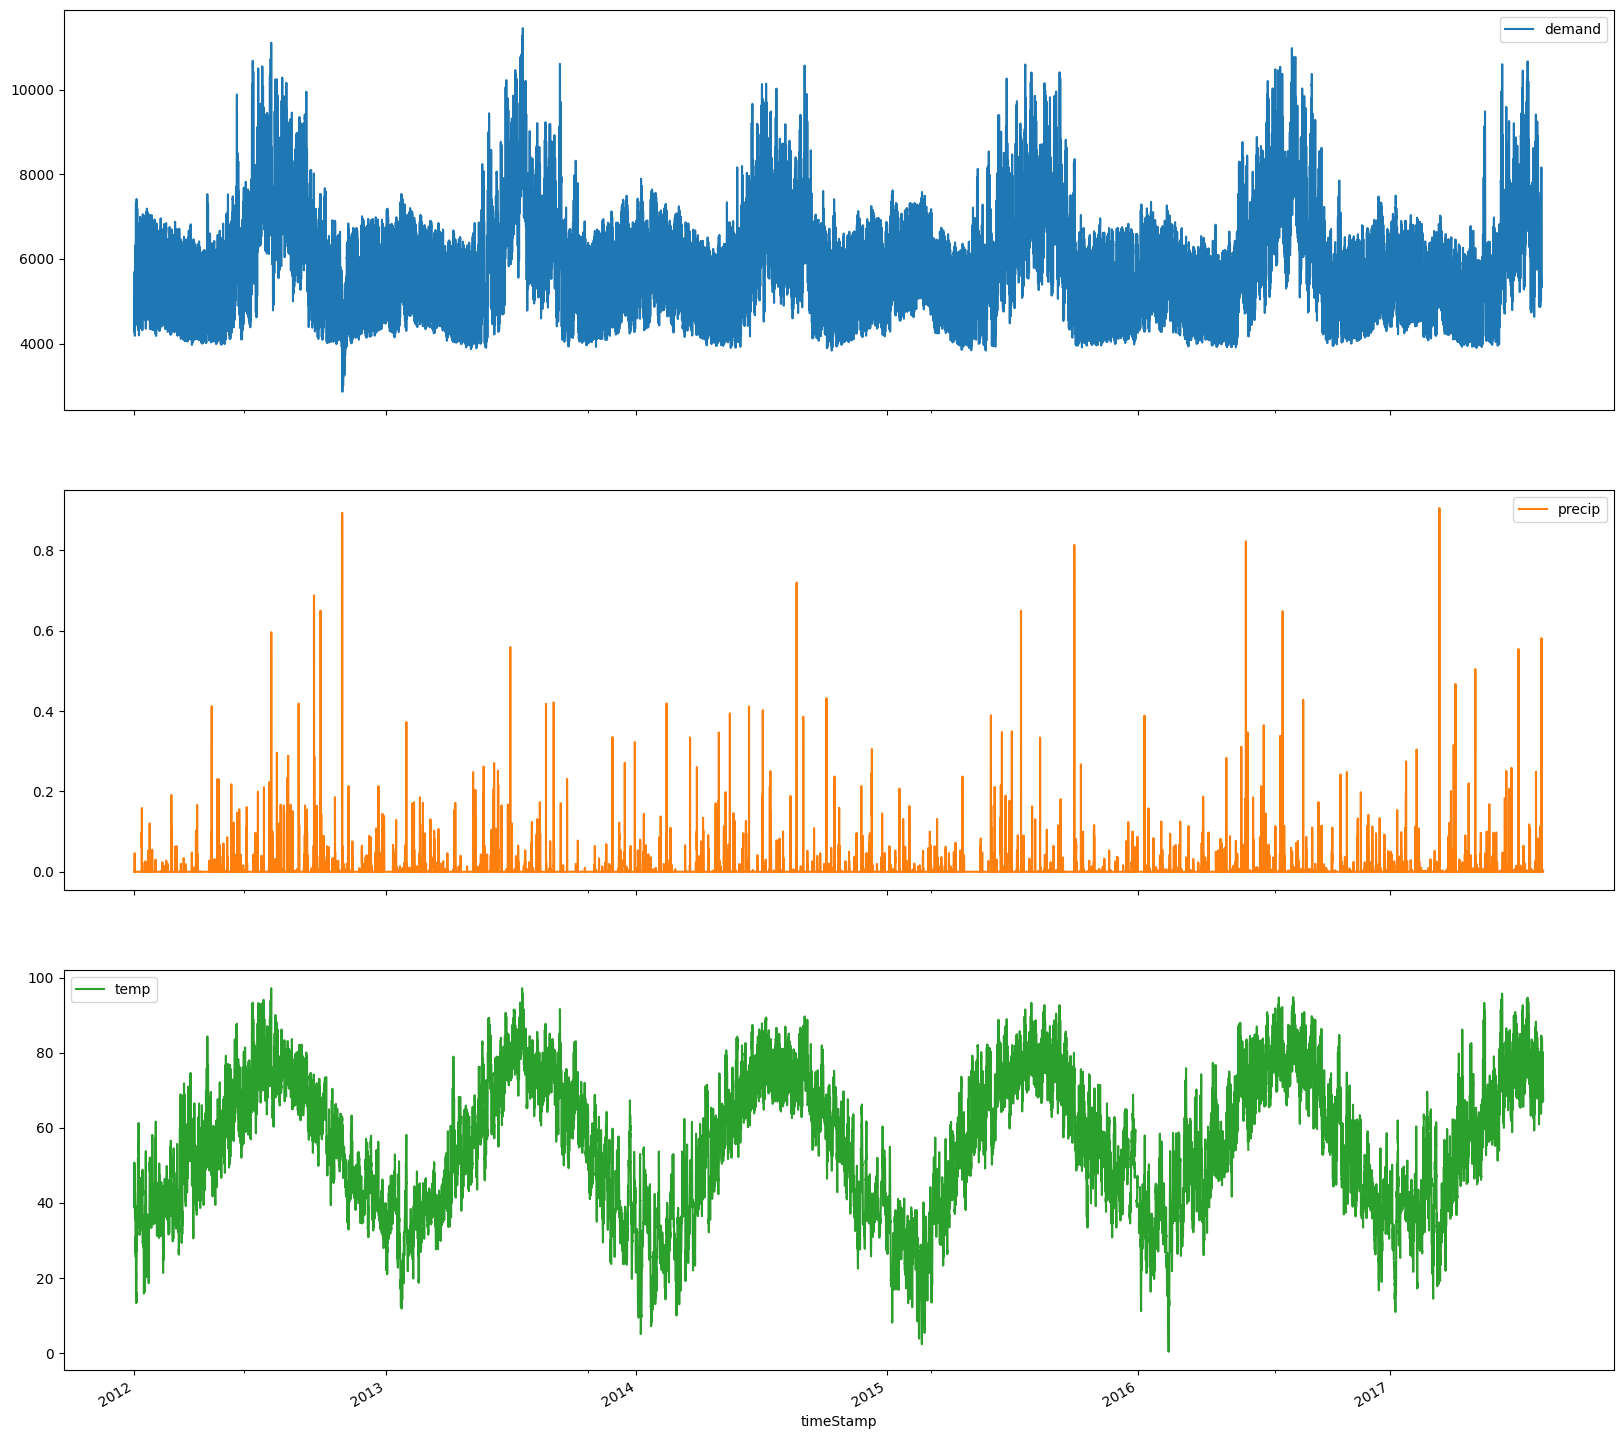

In [54]:
df.plot(subplots=True, figsize=(20, 20))
plt.show()

In [55]:
print(df.describe())

             demand        precip          temp
count  49124.000000  48975.000000  49019.000000
mean    6067.447361      0.003522     55.520428
std     1285.607657      0.022841     17.704848
min     2859.600000      0.000000      0.330000
25%     5133.862250      0.000000     41.415000
50%     6020.071000      0.000000     56.260000
75%     6684.300000      0.000000     70.540000
max    11456.000000      0.905100     97.260000


In [56]:
print(df.isnull().sum())

demand     81
precip    230
temp      186
dtype: int64


In [57]:
df.fillna(method='ffill', inplace=True)

<ipython-input-57-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


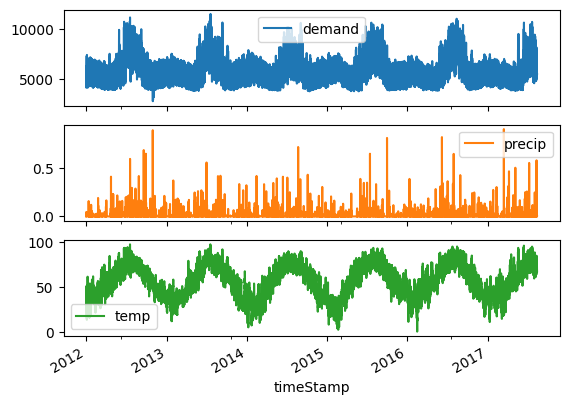

In [58]:
df.plot(subplots=True)
plt.show()

# Data Preprocessing


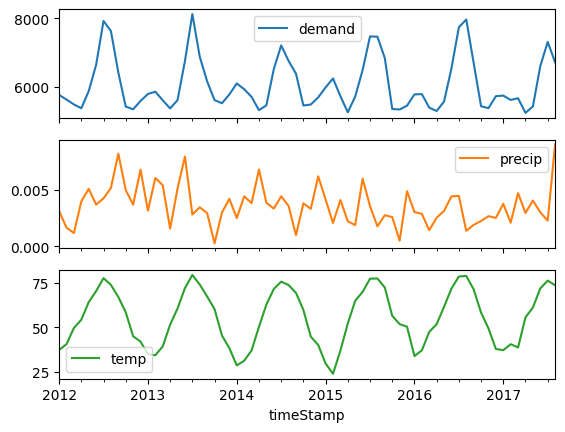

In [59]:
df.resample('M').mean().plot(subplots=True)
plt.show()

# Rolling Mean and Resampling


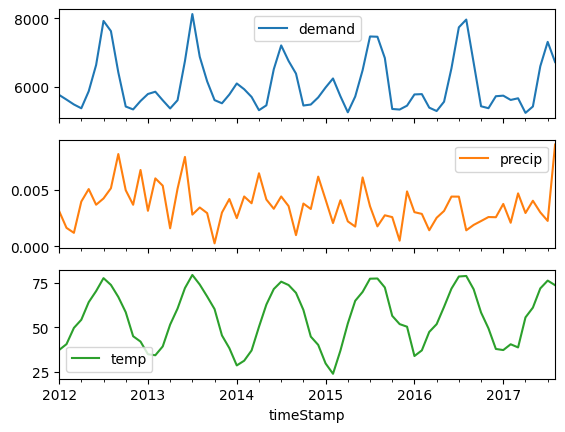

In [75]:
df['demand']=df['demand'].rolling(window=3).mean()
df['temp']=df['temp'].rolling(window=3).mean()
df['precip']=df['precip'].rolling(window=3).mean()
df.resample('M').mean().plot(subplots=True)
plt.show()

# Stationarity Check


In [62]:
from statsmodels.tsa.stattools import kpss

df['demand'] = df['demand'].fillna(method='ffill').fillna(method='bfill')
stats, p_value, n_lags, critical_values = kpss(df['demand'])
print(f'KPSS Statistic: {stats}')
print(f'p-value: {p_value}')
print(f'Number of Lags: {n_lags}')
print(f'Critical Values: {critical_values}')


KPSS Statistic: 0.19533948276973362
p-value: 0.1
Number of Lags: 109
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-62-611d27515192>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['demand'] = df['demand'].fillna(method='ffill').fillna(method='bfill')
<ipython-input-62-611d27515192>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stats, p_value, n_lags, critical_values = kpss(df['demand'])


In [63]:
if p_value > 0.05:
    print(f"The data is stationary (p-value: {p_value:.5f})")
else:
    print(f"The data is non-stationary (p-value: {p_value:.5f})")

The data is stationary (p-value: 0.10000)


In [64]:
!pip install pmdarima

# ARIMA Model


In [65]:
import pmdarima as pm

In [76]:
df_monthly = df.resample('M').mean()
model = pm.auto_arima(df_monthly['demand'],
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.342, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.685, Time=2.19 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.760, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.532, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1025.166, Time=1.30 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1101.739, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.064, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.294, Time=0.10 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1017.348, Time=1.52 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=i

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.461
Date:                                 Thu, 15 Aug 2024   AIC                            992.922
Time:                                         10:47:23   BIC                           1006.239
Sample:                                     01-31-2012   HQIC                           998.199
                                          - 08-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3720.6766    791.861      4.699      0.000    2168.658    5272.695
ar.L1          0.8586      0.123      6.998      0.000       0.618       1.099
ar.L2         -0.4747      0.141     -3.361      0.001      -0.751      -0.198
ma.S.L12       0.8957      0.138      6.505      0.000       0.626       1.166
ma.S.L24       0.4607      0.206      2.232      0.026       0.056       0.865
sigma2      9.001e+04   1.57e+04      5.715      0.000    5.91e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.57
Prob(Q):                              0.89   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
print("AIC : ",model.aic())
print("BIC : ",model.bic())

AIC :  992.9220654548056
BIC :  1006.2391116858623


In [113]:
train=df_monthly[(df_monthly.index.get_level_values(0) >= '2012-01-31') & (df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=df_monthly[(df_monthly.index.get_level_values(0) > '2017-04-30')]

In [114]:
train.shape

(64, 3)

In [115]:
test.shape

(4, 3)

In [116]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5420.836046,0.004031,61.101030
2017-06-30,6595.016001,0.003007,71.946361
2017-07-31,7307.382378,0.002248,76.365291
2017-08-31,6717.988601,0.009001,73.766027


In [117]:
model.fit(train['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

# Forecasting and Visualization


In [118]:
forcast = model.predict(n_periods=len(test))

In [119]:
forcast = pd.DataFrame(forcast,index = test.index,columns=['Prediction'])

In [120]:
forcast

,Prediction
timeStamp,
2017-05-31,5317.955163
2017-06-30,6195.482769
2017-07-31,7185.187397
2017-08-31,7297.997825


<Axes: xlabel='timeStamp'>

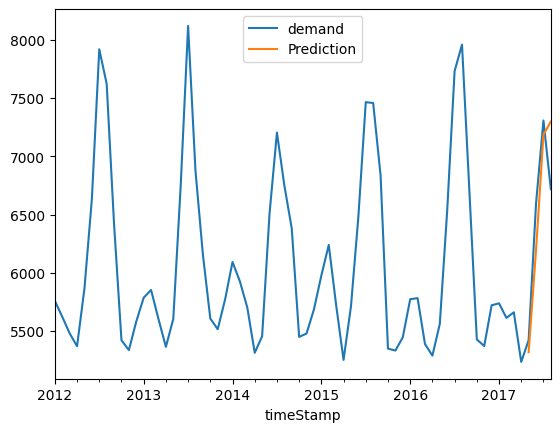

In [122]:
pd.concat([df_monthly['demand'],forcast],axis=1).plot()

In [123]:
forecast1=model.predict(n_periods=8, return_conf_int=True)

In [124]:
forecast1

(2017-05-31    5317.955163
 2017-06-30    6195.482769
 2017-07-31    7185.187397
 2017-08-31    7297.997825
 2017-09-30    6403.506836
 2017-10-31    5789.588362
 2017-11-30    5693.397023
 2017-12-31    5952.335891
 Freq: M, dtype: float64,
 array([[4722.28249022, 5913.62783667],
        [5393.7169687 , 6997.24857015],
        [6360.65098851, 8009.72380509],
        [6468.69973964, 8127.29591017],
        [5556.16483666, 7250.84883531],
        [4934.69815139, 6644.47857258],
        [4838.37007692, 6548.42396961],
        [5096.6455362 , 6808.02624602]]))

In [125]:
forecast_range=pd.date_range(start='2017-05-31', periods=8,freq='M')
forecast_range

DatetimeIndex(['2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [126]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])
forecast1_df

,Prediction
2017-05-31,5317.955163
2017-06-30,6195.482769
2017-07-31,7185.187397
2017-08-31,7297.997825
2017-09-30,6403.506836
2017-10-31,5789.588362
2017-11-30,5693.397023
2017-12-31,5952.335891


# Future Forecasting


<Axes: >

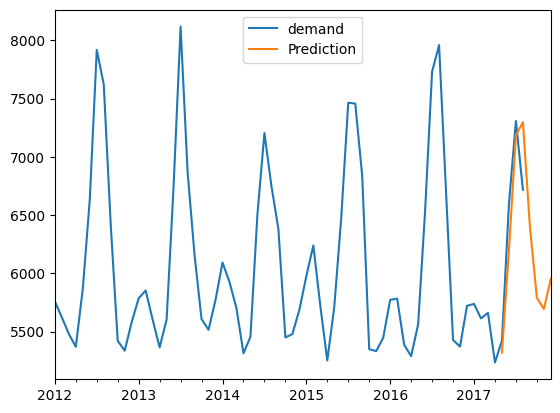

In [127]:
pd.concat([df_monthly['demand'],forecast1_df],axis=1).plot()

In [128]:
forecast_range=pd.date_range(start='2017-05-31', periods=8,freq='M')
forecast_range

DatetimeIndex(['2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [129]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

# Model Diagnostics


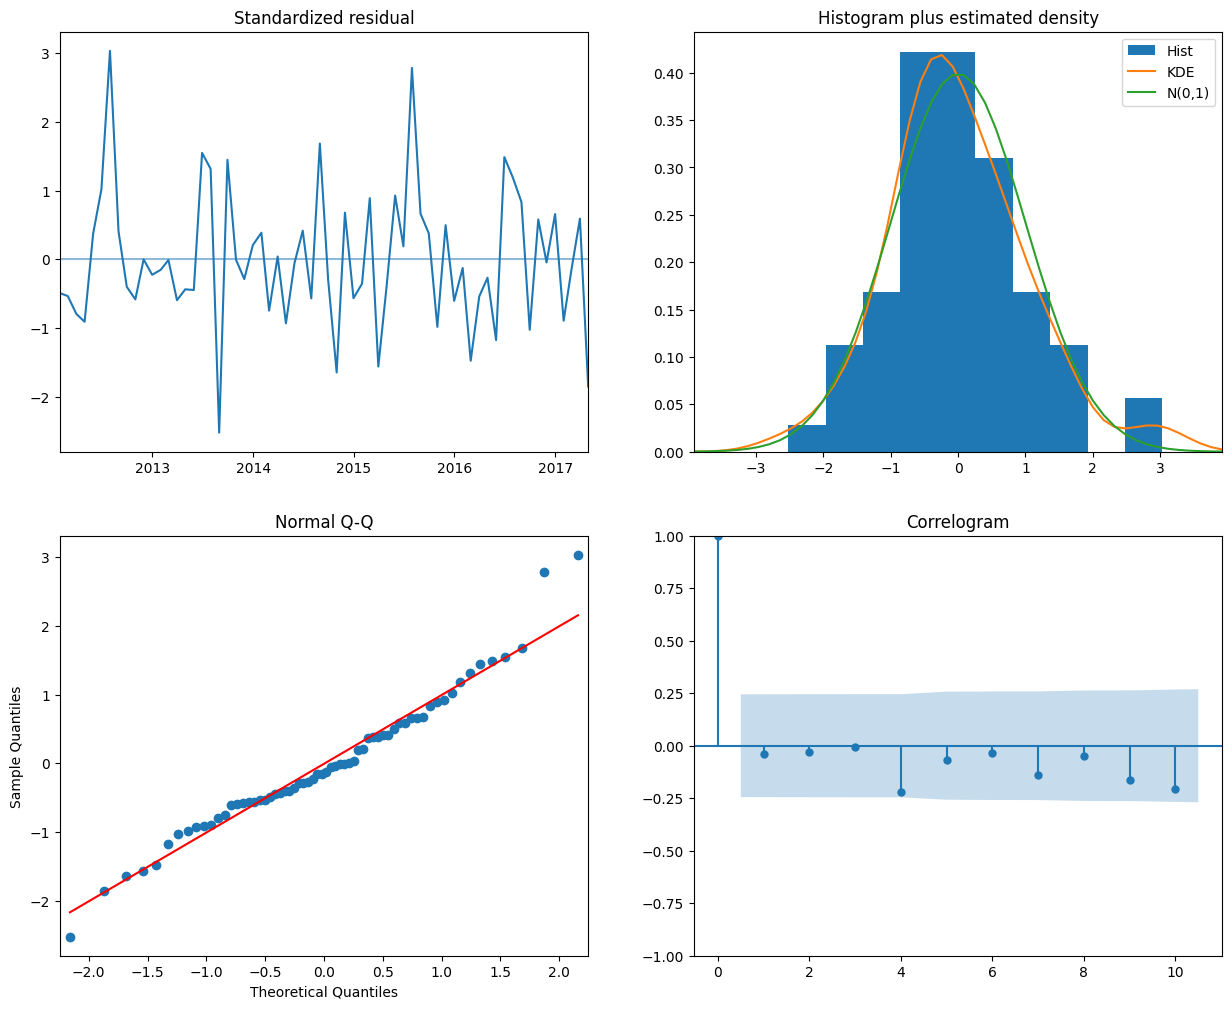

In [130]:
out = model.plot_diagnostics(figsize=(15, 12))